# Section 9 - Python for Data Visualization - Seaborn
* Distribution Plots
* Categorical Plots
* Matrix Plots
* Grids
* Regression Plots
* Style and Color
___
## [Documentation] (https://seaborn.pydata.org/)
___

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

___
#  <font color='Maroon'>Distribution Plots</font>
___
* distplot // kdeplot
* jointplot
* pairplot
* rugplot
* from rugplot to kdeplot
___

* Seaborn is a statistical plotting library built on top of matplotlib.
* bins --> definition
* univariate data --> distplot, rugplot
* bivariate data --> jointplot, pairplot

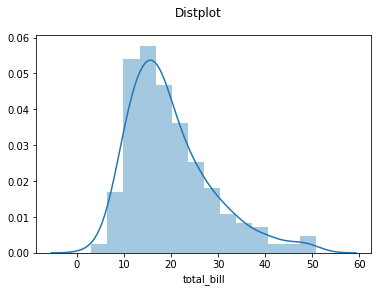

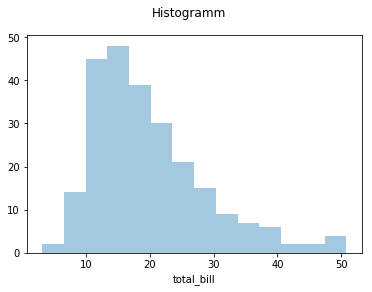

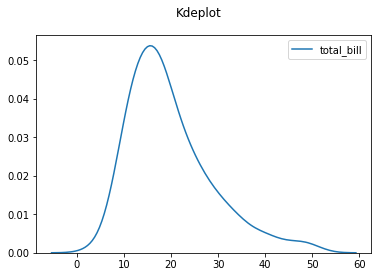

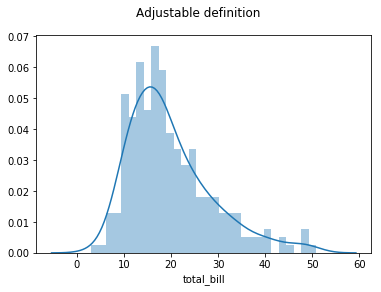

In [106]:
tips = sns.load_dataset('tips')

#DISTPLOT

#HISTOGRAMM and KDE (kernel density estimation)
sns.distplot(tips['total_bill'])
plt.suptitle('Distplot')
plt.show()

#no kdeplot
sns.distplot(tips['total_bill'], kde=False)
plt.suptitle('Histogramm')
plt.show()

#just kdeplot
sns.kdeplot(tips['total_bill'])
plt.suptitle('Kdeplot')
plt.show()

#definition
sns.distplot(tips['total_bill'], bins=30)
plt.suptitle('Adjustable definition')
plt.show()

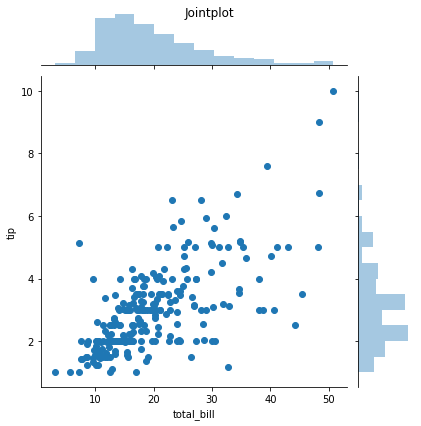

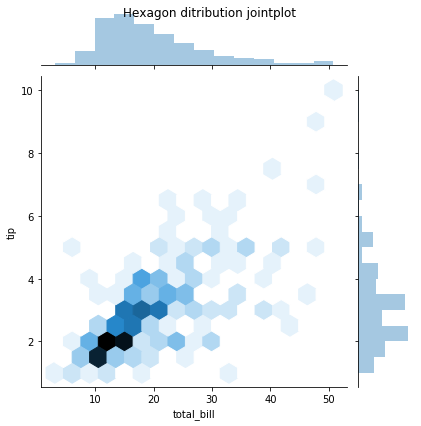

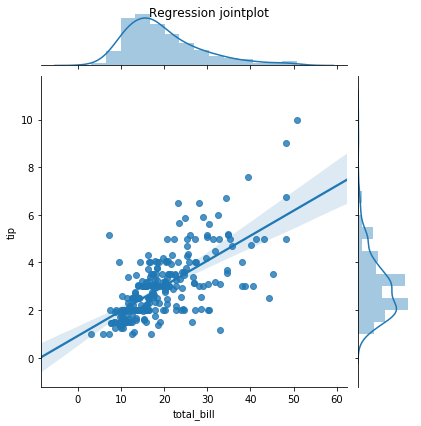

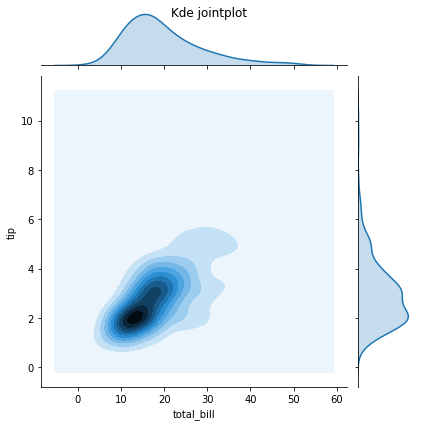

In [107]:
#JOINTPLOT --> scatterplot and two distribution plots
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.suptitle('Jointplot')
plt.show()

#hexagon distribution representation [more points --> darker]
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
plt.suptitle('Hexagon ditribution jointplot')
plt.show()

#regression
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')
plt.suptitle('Regression jointplot')
plt.show()

#kde --> shows the density of which thesse points match up the most
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')
plt.suptitle('Kde jointplot')
plt.show()

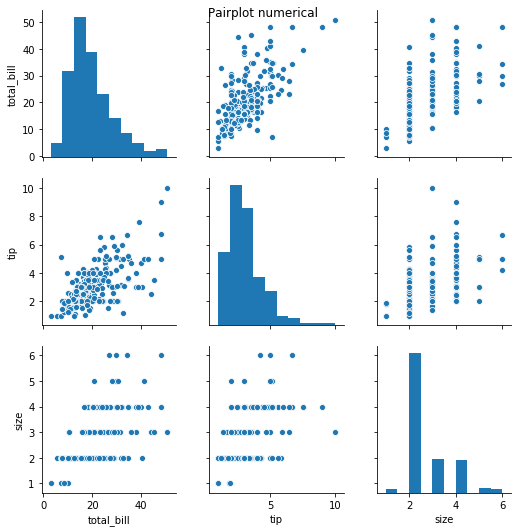

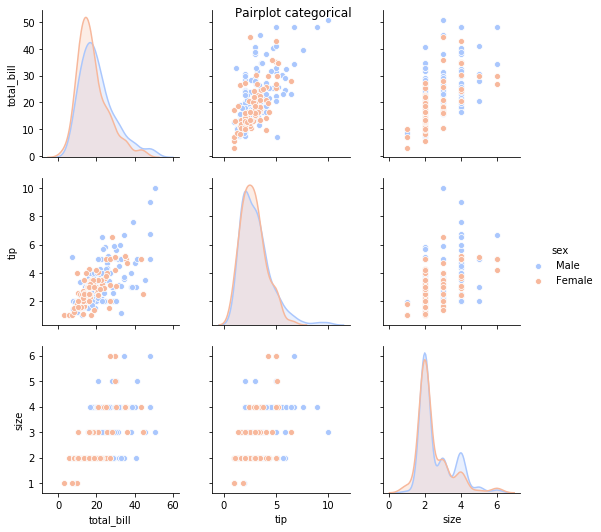

In [108]:
#PAIRPLOT --> jointplot for every single combination of numerical columns in the datarfame
sns.pairplot(tips)
plt.suptitle('Pairplot numerical')
plt.show()

#hue --> pass the name of a categorical column
sns.pairplot(tips, hue='sex', palette='coolwarm')
plt.suptitle('Pairplot categorical')
plt.show()

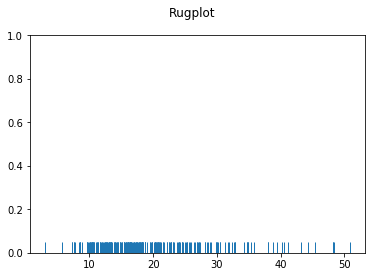

In [109]:
#RUGPLOT --> draws a dash mark for every point of this univariate distribution
sns.rugplot(tips['total_bill'])
plt.suptitle('Rugplot')
plt.show()

(0, 1)

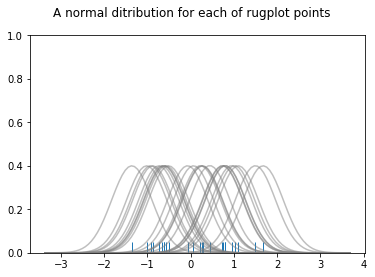

In [110]:
#Jose's code
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)
    plt.suptitle('A normal ditribution for each of rugplot points')

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

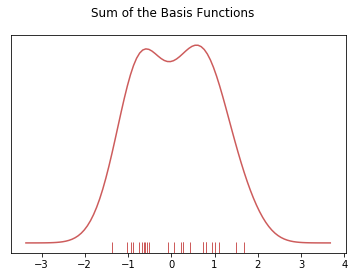

In [161]:
#Jose's code
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

___
# <font color='maroon'>Categorical Plots</font>
___
* barplot
* counterplot
* boxplot (box and whisker plot)
* violinplot
* stripplot
* swarmplot
* catplot

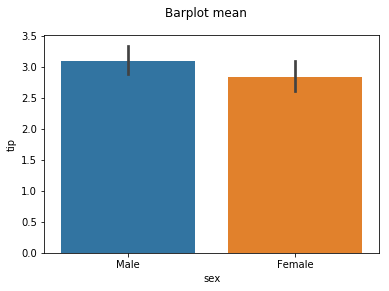

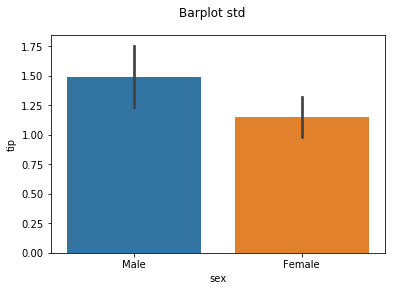

In [112]:
#BARPLOT --> aggregate the categorical data based off of some function [by default that' the mean]
sns.barplot(x='sex', y='tip', data=tips)
plt.suptitle('Barplot mean')
plt.show()

#use standard deviation as aggregate function
import numpy as np
sns.barplot(x='sex', y='tip', data=tips, estimator=np.std)
plt.suptitle('Barplot std')
plt.show()

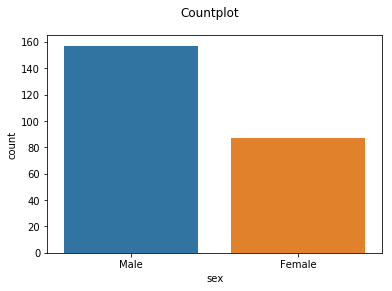

In [113]:
#COUNTPLOT --> like barplot but the estimator counts explicitly the number of occurences
sns.countplot(x='sex', data=tips)
plt.suptitle('Countplot')
plt.show()

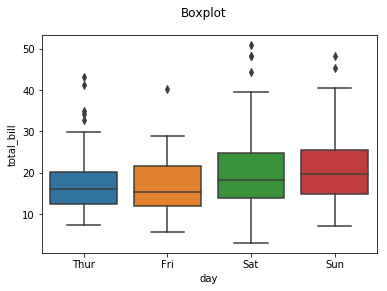

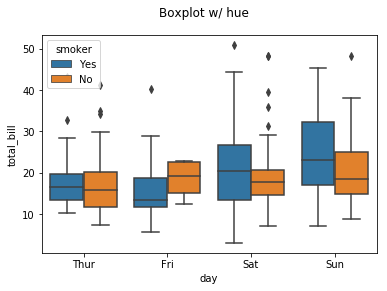

In [114]:
#BOXPLOT (BOX and WHISKER PLOT) --> show the distribution of categorical data
sns.boxplot(x='day', y='total_bill', data=tips)
plt.suptitle('Boxplot')
plt.show()

#split boxplots futher by another categorical column
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')
plt.suptitle('Boxplot w/ hue')
plt.show()


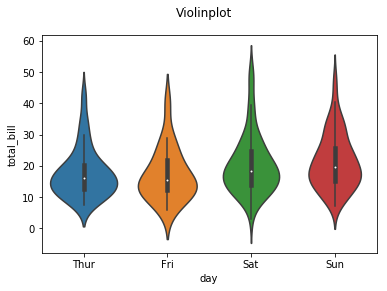

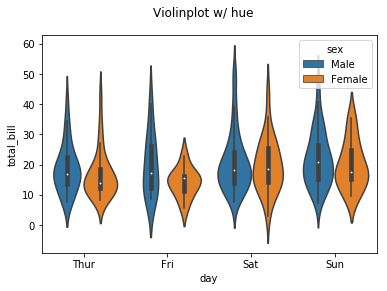

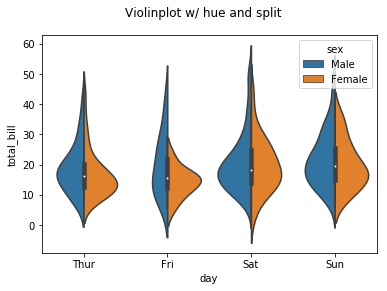

In [115]:
#VIOLINPLOT --> plot all the components that correspond to actual data points
sns.violinplot(x='day', y='total_bill', data=tips)
plt.suptitle('Violinplot')
plt.show()

#split violinplots futher by 'sex'
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex')
plt.suptitle('Violinplot w/ hue')
plt.show()

#split violinplots futher by 'sex' and use SPLIT --> straight comparison
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)
plt.suptitle('Violinplot w/ hue and split')
plt.show()

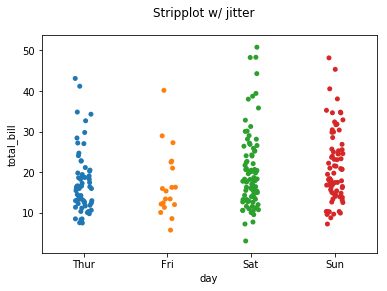

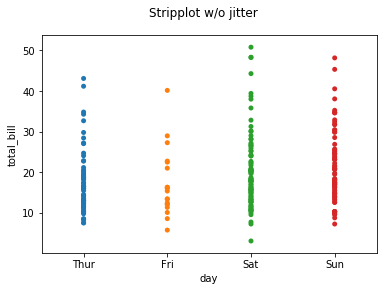

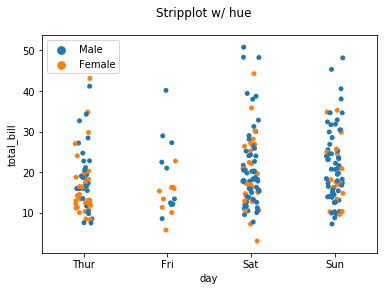

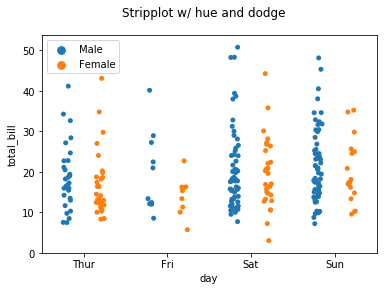

In [138]:
#STRIPPLOT --> scatterplot based on a category
#jitter adds a little of random noise to separate the stacked points
sns.stripplot(x='day', y='total_bill', data=tips)
plt.suptitle('Stripplot w/ jitter')
plt.show()

# stripplot w/o jitter
sns.stripplot(x='day', y='total_bill', data=tips, jitter=False)
plt.suptitle('Stripplot w/o jitter')
plt.show()

# stripplot w/ hue
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex')
plt.suptitle('Stripplot w/ hue')
plt.legend(loc='best')    #για τη μαρκίζα με τα labels
plt.show()

# stripplot w/ hue and dodge
# DODGE = SPLIT
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', dodge=True)
plt.suptitle('Stripplot w/ hue and dodge')
plt.legend(loc='best')
plt.show()

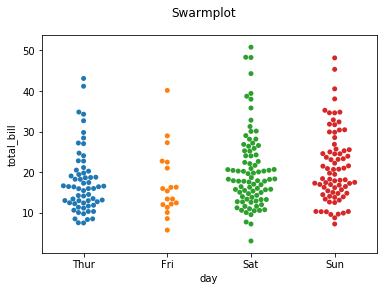

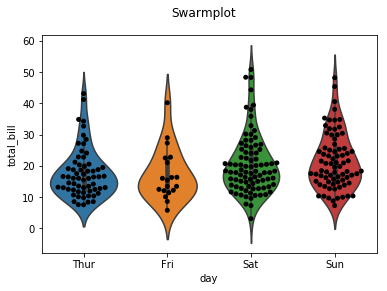

In [135]:
#SWARMPLOT --> VIOLINPLOT + SCATTERPLOT
sns.swarmplot(x='day', y='total_bill', data=tips)
plt.suptitle('Swarmplot')
plt.show()

#swarmplot + violinplot
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black'#)
plt.suptitle('Swarmplot')
plt.show()

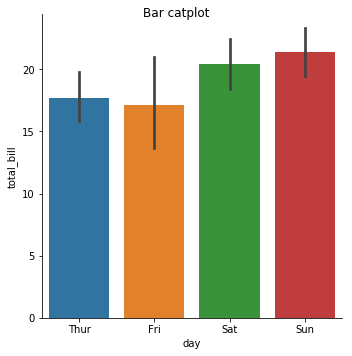

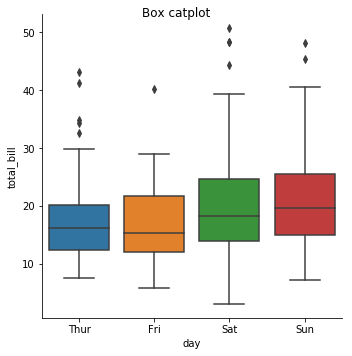

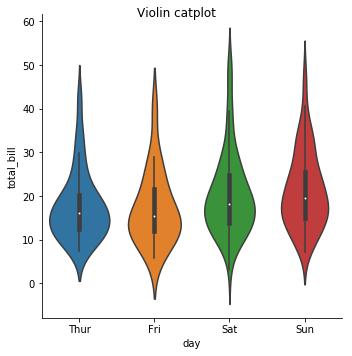

In [160]:
#CATPLOT --> general way to create any kind of plot
#bar
sns.catplot(x='day', y='total_bill', data=tips, kind='bar')
plt.suptitle('Bar catplot')
plt.show()

#violin
sns.catplot(x='day', y='total_bill', data=tips, kind='box')
plt.suptitle('Box catplot')
plt.show()

#violin
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')
plt.suptitle('Violin catplot')
plt.show()

___
# <font color='maroon'>Matrix Plots</font>
___
* Heatmap
    * Correlation
    * Pivot
* Clustermap

In order for heatmap to work properly, the data must be in a matrix form. This means that the index name and the column name match up.

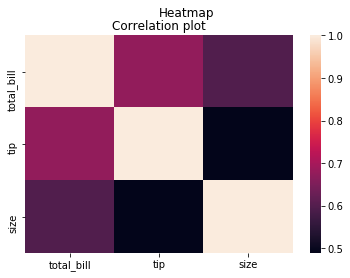

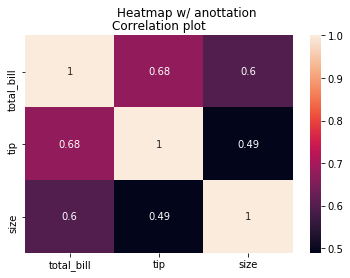

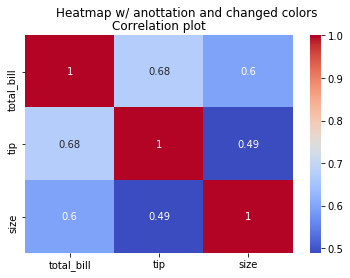

In [180]:
#CORRELATION
tc = tips.corr()

sns.heatmap(tc)
plt.title('Correlation plot')
plt.suptitle('Heatmap')
plt.show()

#with anottation
sns.heatmap(tc, annot=True)
plt.title('Correlation plot')
plt.suptitle('Heatmap w/ anottation')
plt.show()

#change the color
sns.heatmap(tc, annot=True, cmap='coolwarm')
plt.title('Correlation plot')
plt.suptitle('Heatmap w/ anottation and changed colors')
plt.show()

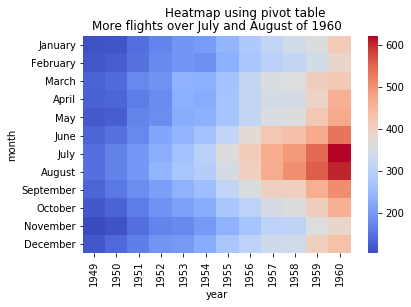

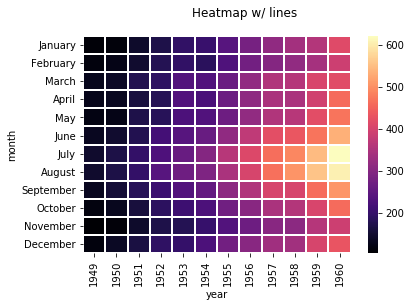

In [198]:
# PIVOT
#color mapping = coolwarm --> warmer => more density
flights = sns.load_dataset('flights')
fp = flights.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(fp, cmap = 'coolwarm')
plt.suptitle('Heatmap using pivot table')
plt.title('More flights over July and August of 1960')
plt.show()

#color mapping = magma --> lighter --> more density
sns.heatmap(fp, cmap='magma', linecolor='white', linewidth=1)
plt.suptitle('Heatmap w/ lines')
plt.show()

Text(0.5, 1.0, 'Clusters columns and rows together based off their similarity')

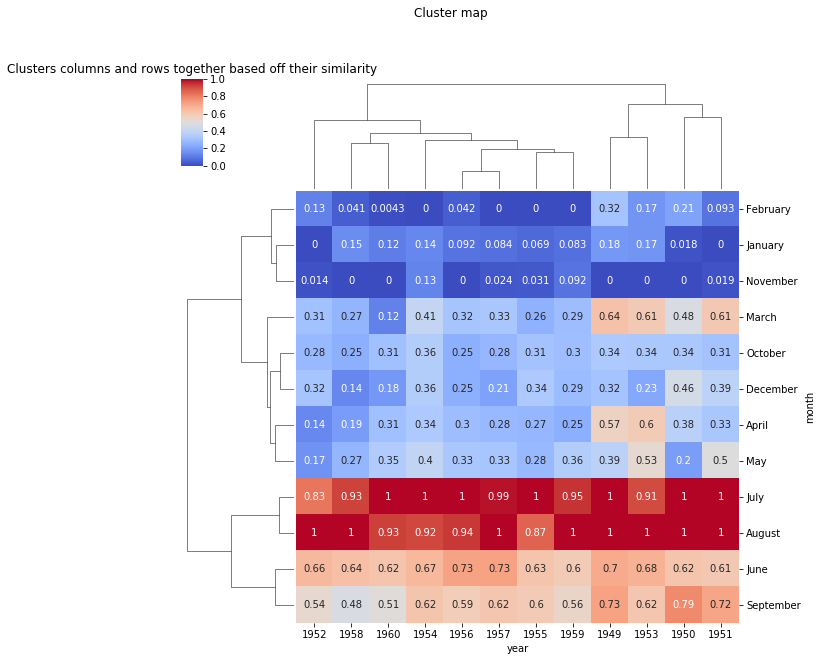

In [204]:
#CLUSTERMAP --> Clusters columns and rows together based off their similarity
#standard scale => normalization
sns.clustermap(fp, cmap='coolwarm', standard_scale=1, annot=True)
plt.suptitle('Cluster map')
plt.title('Clusters columns and rows together based off their similarity')

___
# <font color='maroon'>Grids</font>
___
* Pair Grid
    * Like pairplot, but more custom
* Facet Grid
    *

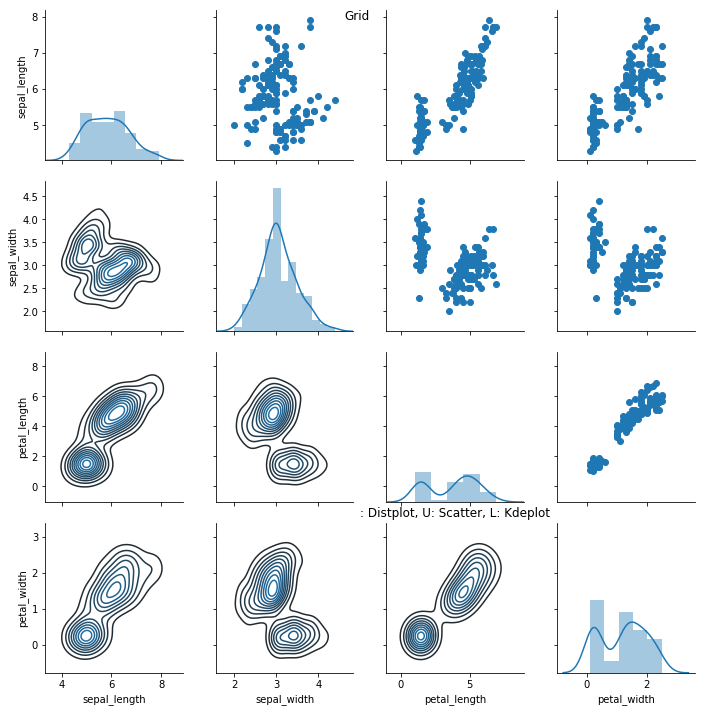

In [223]:
#PAIR GRID
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.suptitle('Grid')
plt.title(': Distplot, U: Scatter, L: Kdeplot')
plt.show()

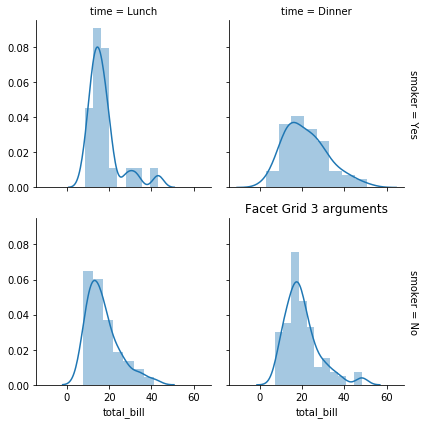

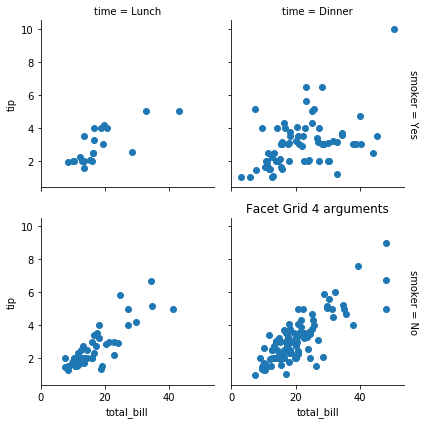

In [243]:
#FACET GRID --> 3 arguments at play

#3 arguments at play
g = sns.FacetGrid(data=tips, col='time', row='smoker', margin_titles=True)
g.map(sns.distplot, 'total_bill')
plt.title('Facet Grid 3 arguments')
plt.tight_layout()
plt.show()

#4 arguments at play
g = sns.FacetGrid(data=tips, col='time', row='smoker', margin_titles=True)
g.map(plt.scatter, 'total_bill', 'tip')
plt.title('Facet Grid 4 arguments')
plt.tight_layout()
plt.show()

___
# <font color='maroon'>Regression Plots</font>
___

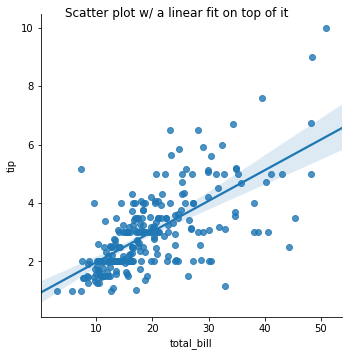

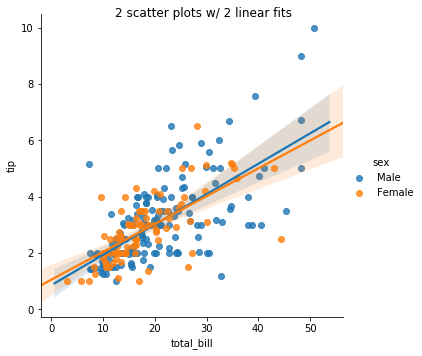

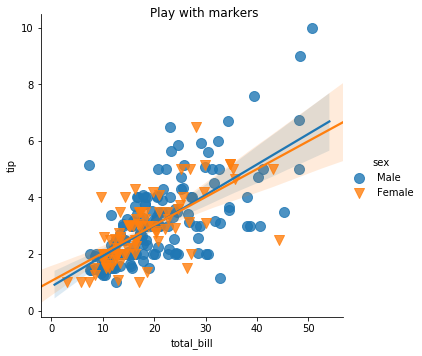

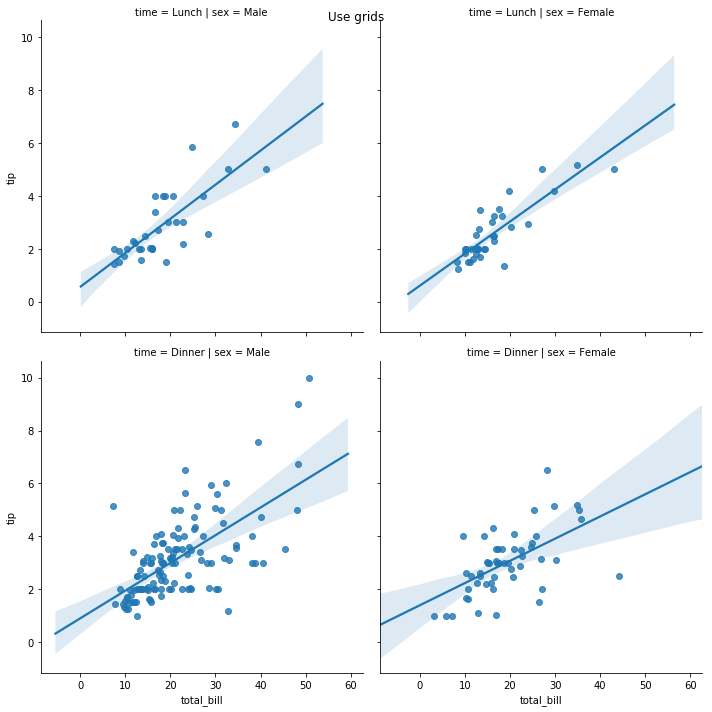

In [252]:
#scatter plot w/ a linear fit on top of it
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.suptitle('Scatter plot w/ a linear fit on top of it')
plt.show()

#using hue --> 2 scatter plots and  linear fits
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.suptitle('2 scatter plots w/ 2 linear fits')
plt.show()

#play with markers
#markers --> symbol of representation
#scatter_kws['s'] --> size of markers
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o','v'], scatter_kws={'s': 100})
plt.suptitle('Play with markers')
plt.show()

#using grids
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time')
plt.suptitle('Use grids')
plt.show()


___
# <font color='maroon'>Style and Color</font>
___
[Colormaps Documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

<Figure size 432x288 with 0 Axes>

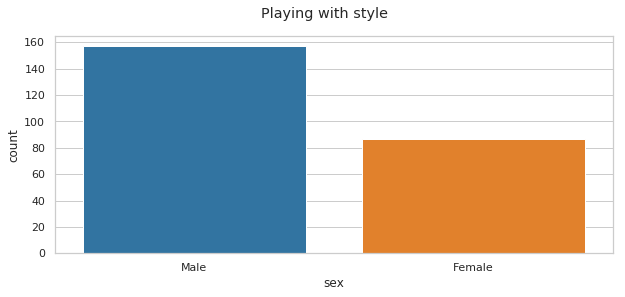

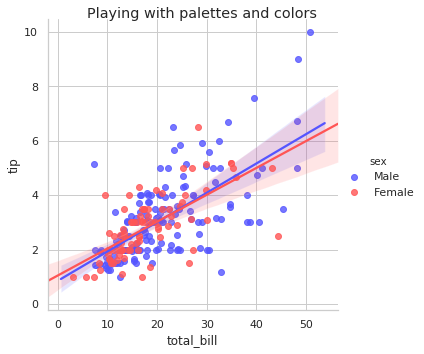

In [282]:
# background (the grid)
#stays in place until I set a new style
sns.set_style('whitegrid')

#remove top and right spine
sns.despine(top=True, right=True)

#change the size
plt.figure(figsize=(10,4))

#change the font size
sns.set_context('notebook')

sns.countplot(x='sex', data=tips)
plt.suptitle('Playing with style')
plt.show()

#Palettes and color
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='seismic')
plt.suptitle('Playing with palettes and colors')
plt.show()